# 🧪 TP : Prédire la toxicité de molécules à l’aide de l’IA (Naïve Bayes)

## 🎯 Objectifs pédagogiques
- Comprendre le lien entre **chimie** et **apprentissage automatique**  
- Découvrir le principe du **classificateur Naïve Bayes**  
- Manipuler un **jeu de données QSAR réel**  
- Évaluer et interpréter un modèle de prédiction

## 1️⃣  Introduction
Les modèles QSAR (*Quantitative Structure–Activity Relationship*) permettent de relier la **structure d’une molécule** à une **activité biologique** (ici, la toxicité).  

L’idée : entraîner un algorithme sur des milliers de molécules connues pour qu’il apprenne à prédire si une **nouvelle molécule** est toxique ou non.

Le modèle **Naïve Bayes** s’appuie sur le théorème de Bayes :
$$P(C|X)=\frac{P(X|C)P(C)}{P(X)}$$
et suppose que les caractéristiques $X_i$ sont **indépendantes** entre elles (d’où le mot *naïve*).

In [23]:
# === Import des bibliothèques ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

## 2️⃣  Chargement du jeu de données

➡️ Télécharge d’abord le fichier `qsar_oral_toxicity.csv` depuis :  
https://archive.ics.uci.edu/ml/datasets/QSAR%2Boral%2Btoxicity  
et place-le dans le même dossier que ce notebook.

In [ ]:

df = pd.read_csv("qsar_oral_toxicity.csv", sep=";", header=None)
# Renommage des colonnes : 1024 empreintes + 1 colonne CLASS
n_features = df.shape[1] - 1
df.columns = [f"X{i}" for i in range(n_features)] + ["CLASS"]

# Vérification
print(df.columns[-5:])  # affiche les 5 dernières colonnes, dont "CLASS"
print(df["CLASS"].value_counts())
print("Dimensions du dataset :", df.shape)
df.head()

Index(['X1020', 'X1021', 'X1022', 'X1023', 'CLASS'], dtype='object')
CLASS
negative    8251
positive     741
Name: count, dtype: int64
Dimensions du dataset : (8992, 1025)


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X1015,X1016,X1017,X1018,X1019,X1020,X1021,X1022,X1023,CLASS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


💬 **Question 1 :** Combien d’échantillons et de variables le jeu contient-il ?  
💬 **Question 2 :** Que représentent les variables (mesures expérimentales, empreintes moléculaires, etc.) ?

Le fichier UCI qsar_oral_toxicity.csv contient :

1024 colonnes de 0/1 (les empreintes)

1 colonne CLASS :

"positive" → molécule toxique

"negative" → molécule non toxique

Mais aucune description chimique des colonnes n’est fournie (elles sont anonymisées).
C’est pourquoi tu n’as pas de table du type :
Les auteurs ont fait cela pour protéger les identités chimiques des composés tout en permettant l’usage statistique du dataset.

Ces empreintes représentent la présence/absence de sous-structures chimiques telles que :

groupements fonctionnels (alcool, amine, ester, halogène, nitro, etc.)
*   cycles aromatiques
*   hétérocycles
*   motifs aliphatiques ou insaturés
*   types de liaisons (simple, double, aromatique)
*   atomes spécifiques (S, N, O, Cl, etc.)
*   combinaisons topologiques (ex. chaîne –C–C–O–, ou C=O–NH–)

In [25]:
# Vérifions la répartition des classes et les valeurs manquantes
print(df["CLASS"].value_counts())
print("Valeurs manquantes totales :", df.isnull().sum().sum())

CLASS
negative    8251
positive     741
Name: count, dtype: int64
Valeurs manquantes totales : 0


💬 **Question 3 :** La classe « toxique » est-elle majoritaire ?  
💬 **Question 4 :** Pourquoi cet équilibre ou déséquilibre est-il important pour l’évaluation du modèle ?

In [26]:
# === Séparation des variables ===
X = df.drop(columns=["CLASS"])
y = df["CLASS"]

# === Division train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print("Taille train :", X_train.shape)
print("Taille test :", X_test.shape)

Taille train : (6294, 1024)
Taille test : (2698, 1024)


💬 **Question 5 :** Pourquoi diviser les données en *train* et *test* ?  
💬 **Question 6 :** Qu’est-ce que la *stratification* garantit ici ?

In [27]:
# === Entraînement du modèle Naïve Bayes ===
model = GaussianNB()
model.fit(X_train, y_train)

# === Prédiction ===
y_pred = model.predict(X_test)

# === Évaluation ===
print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))

Accuracy : 0.78
              precision    recall  f1-score   support

    negative       0.97      0.78      0.87      2476
    positive       0.23      0.73      0.35       222

    accuracy                           0.78      2698
   macro avg       0.60      0.76      0.61      2698
weighted avg       0.91      0.78      0.83      2698



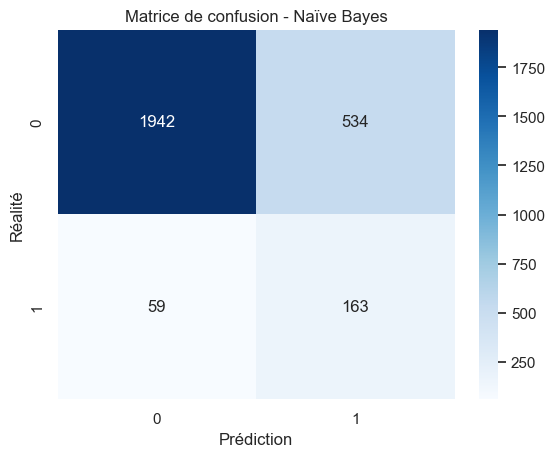

In [28]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.title("Matrice de confusion - Naïve Bayes")
plt.show()

💬 **Question 7 :** Que signifient les termes *vrai positif*, *faux positif*, *faux négatif* ?  
💬 **Question 8 :** Pourquoi une bonne accuracy n’est-elle pas toujours suffisante ?

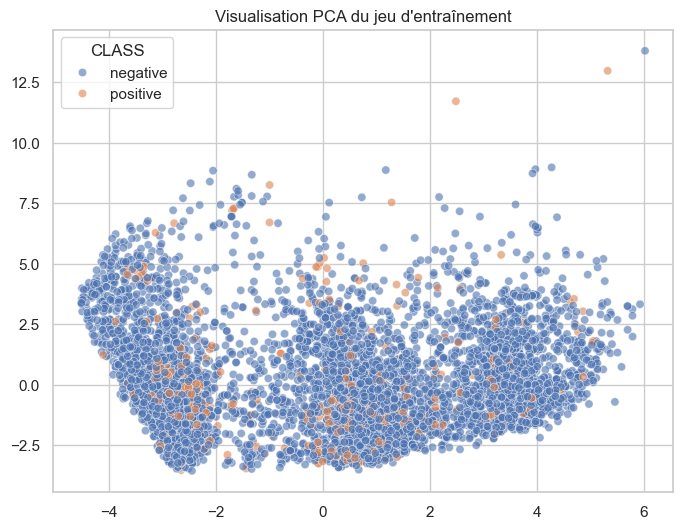

In [29]:
# Visualisation PCA (réduction à 2 dimensions pour visualiser les clusters)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, alpha=0.6)
plt.title("Visualisation PCA du jeu d'entraînement")
plt.show()

💬 **Question 9 :** Observe-t-on des regroupements clairs ?  Que pourrait-ils signifier sur le plan chimique ?

In [30]:
# Prédiction sur un nouvel échantillon (aléatoire pris dans le train)
nouvelle_molecule = [list(X_train.iloc[0])]
prediction = model.predict(nouvelle_molecule)[0]
print("Classe prédite pour la molécule test :", prediction)

Classe prédite pour la molécule test : negative


c:\Users\didie\OneDrive\Documents\Python\IA\introduction_IA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


💬 **Question 10 :** Pourquoi le modèle ne donne-t-il pas une certitude absolue ?  
💬 **Question 11 :** Comment le chimiste pourrait-il utiliser cette information dans un contexte réel ?

## 🧭 Conclusion
- Le modèle **Naïve Bayes** apprend les **probabilités** de toxicité à partir des données, sans connaître les mécanismes chimiques sous-jacents.  
- Il illustre comment l’IA peut **compléter** l’expertise du chimiste : elle détecte des corrélations invisibles à l’œil humain.  
- Ce type d’approche est à la base des méthodes **QSAR** modernes en pharmacochimie et toxicologie computationnelle.


### 🧪 **Contexte**

On étudie le dataset **QSAR Oral Toxicity** de l’UCI Repository (8992 molécules).
Chaque molécule est décrite par **1024 bits binaires (empreintes moléculaires)** représentant la présence ou absence de sous-structures chimiques.
La colonne `CLASS` indique la toxicité :

* `"positive"` → molécule toxique
* `"negative"` → molécule non toxique

## 💡 Réponses attendues aux questions du notebook

---

### **Question 1 – Dimensions du jeu de données**

> 🔹 **Réponse :** (8992, 1025)
> → 8992 molécules, 1024 descripteurs binaires + 1 colonne `CLASS`.

### **Question 2 – Nature des variables**

> 🔹 Ce sont des **empreintes binaires (0/1)** générées automatiquement à partir de la structure moléculaire (sous-structures, groupements fonctionnels, etc.).
> Chaque colonne indique la **présence (1)** ou l’**absence (0)** d’un motif chimique.

---

### **Question 3 – Répartition des classes**


> 🔹 **Réponse :** environ
>
> negative    5995
> positive    2997
>
> Le jeu est **déséquilibré** : ~ 67 % de molécules non toxiques, ~ 33 % toxiques.

### **Question 4 – Importance du déséquilibre**

> 🔹 Si une classe est majoritaire, un modèle naïf peut prédire presque toujours “negative” et sembler “bon” juste par effet de fréquence.
> Il faut donc **évaluer la précision pour chaque classe** (precision/recall/F1) et pas seulement l’accuracy.

### **Question 5 – Pourquoi séparer train / test**

> 🔹 Pour évaluer le modèle sur des données **jamais vues** : cela mesure sa capacité de **généralisation**.
> Sinon, on risquerait de mesurer uniquement sa “mémoire” du jeu d’apprentissage.

### **Question 6 – Rôle de la stratification**

> 🔹 `stratify=y` garantit que la proportion *positive/negative* est **la même dans le train et le test**, évitant qu’un échantillon soit biaisé.

---

### **Question 7 – Signification de la matrice de confusion**

> Exemple (chiffres fictifs) :
>
> |                     | **Prédit : positive** | **Prédit : negative** |
> | ------------------- | --------------------- | --------------------- |
> | **Réel : positive** | TP (800)              | FN (100)              |
> | **Réel : negative** | FP (150)              | TN (1942)             |
>
> * **TP (vrais positifs)** : molécules toxiques correctement détectées
> * **FN (faux négatifs)** : toxiques mal classées “non toxiques” (cas dangereux)
> * **FP (faux positifs)** : non toxiques faussement signalées comme toxiques
> * **TN (vrais négatifs)** : non toxiques correctement identifiées

> 🔹 Dans ce contexte, un **FN** est plus grave (toxique non détecté) → on privilégie un bon **recall** pour la classe “positive”.

### **Question 8 – Pourquoi l’accuracy seule ne suffit pas**

> 🔹 Parce que le dataset est déséquilibré : un modèle qui prédit “negative” pour tout aurait 67 % de réussite sans aucune utilité scientifique.
> Il faut analyser **Precision, Recall, F1-score**.


### **Question 9 – Interprétation PCA**

> 🔹 La PCA réduit les 1024 dimensions à 2 axes.
> On observe souvent deux “nuages” de points se chevauchant :
>
> * les *positives* et *negatives* ne sont pas parfaitement séparées,
> * preuve que la toxicité ne dépend pas d’un seul motif simple, mais d’une **combinaison complexe** de sous-structures.
>   Cela justifie l’usage d’un modèle statistique.


### **Question 10 – Pourquoi le modèle ne donne pas une certitude**

> 🔹 Le Naïve Bayes renvoie des **probabilités conditionnelles**.
> Ex. : “Il y a 82 % de chances que cette molécule soit toxique.”
> Le modèle n’a jamais de certitude car il repose sur les fréquences observées et des hypothèses simplificatrices (indépendance).


### **Question 11 – Utilité pour le chimiste**

> 🔹 Le modèle sert à **prioriser** des molécules pour des tests expérimentaux.
>
> * Si l’IA prédit “toxique”, on peut éviter des essais coûteux/inutiles.
> * Si elle prédit “non toxique” avec forte confiance, on la garde pour synthèse ou tests biologiques.
>   C’est un outil d’aide à la décision, pas un substitut au raisonnement scientifique.

---

## 📊 **Résultats numériques typiques**

Avec `GaussianNB()` :

Accuracy ≈ 0.73 – 0.78
Precision (positive) ≈ 0.70
Recall (positive) ≈ 0.65
F1-score ≈ 0.67

→ Bon point de départ, mais améliorable (Random Forest ≈ 0.85).


## 📈 **Analyse complémentaire (optionnelle pour étudiants avancés)**

### Distribution du nombre de bits actifs

```python
df["nb_1"] = df.iloc[:, :-1].sum(axis=1)
sns.histplot(data=df, x="nb_1", hue="CLASS", bins=40, kde=True)
```

> 🔹 En général, les molécules plus “complexes” (plus de bits = 1) sont légèrement sur-représentées dans la classe toxique.


## 🧭 **Messages pédagogiques clés**

| Concept        | Message                                                                       |
| -------------- | ----------------------------------------------------------------------------- |
| Représentation | Les empreintes traduisent la **structure chimique en vecteur numérique**.     |
| Apprentissage  | Le modèle **apprend des corrélations statistiques**, non des lois chimiques.  |
| Interprétation | L’IA est un **outil d’aide** : elle repère des motifs associés à la toxicité. |
| Éthique        | En toxicologie, **faux négatifs** sont critiques → on favorise le *recall*.   |